In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import datetime as dt
import os
import scipy.stats as stats
import pycountry
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols


## Understanding the GDP share of the construction sector

In [185]:

gfcf = pd.read_csv('Transformed Data/GFCF.csv')

gfcf['Year'] = pd.to_datetime(gfcf['Year'], format='%Y')

gfcf.head(10)
#gfcf.describe()

#geo represents the country code, we can use the unique() method to get the unique values of the column.
#time is the year, we can use the unique() method to get the unique values of the column.
#unit is the unit of measurement, we can use the unique() method to get the unique values of the column.

,unit,Year,Construction Value,Country,Dwellings Value
0,CP_MEUR,2015-01-01,36418.8,Austria,14658.8
1,CP_MEUR,2016-01-01,37227.7,Austria,15249.6
2,CP_MEUR,2017-01-01,39064.2,Austria,16556.5
3,CP_MEUR,2018-01-01,42484.1,Austria,17376.3
4,CP_MEUR,2019-01-01,45310.9,Austria,18672.7
5,CP_MEUR,2020-01-01,44886.7,Austria,18940.5
6,CP_MEUR,2021-01-01,50627.9,Austria,21372.6
7,CP_MEUR,2022-01-01,56034.8,Austria,23269.4
8,CP_MEUR,2015-01-01,61834.8,Switzerland,32215.5
9,CP_MEUR,2016-01-01,60133.6,Switzerland,31895.2


In [186]:
gfcf.isnull().sum() # checking null values, none for gfcf dataset

unit                  0
Year                  0
Construction Value    0
Country               0
Dwellings Value       0
dtype: int64

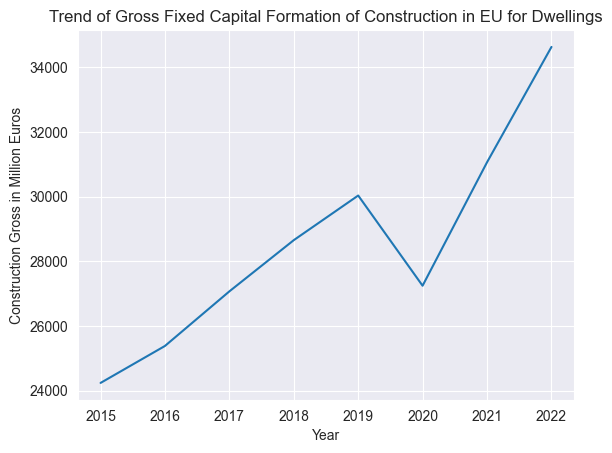

In [187]:
# Group the data by TIME_PERIOD and calculate the average production index for each year
yearly_average = gfcf.groupby('Year')['Dwellings Value'].mean()

# Plot the trend using a line plot
plt.plot(yearly_average.index, yearly_average.values)
plt.xlabel('Year')
plt.ylabel('Construction Gross in Million Euros')
plt.title('Trend of Gross Fixed Capital Formation of Construction in EU for Dwellings')
plt.show()

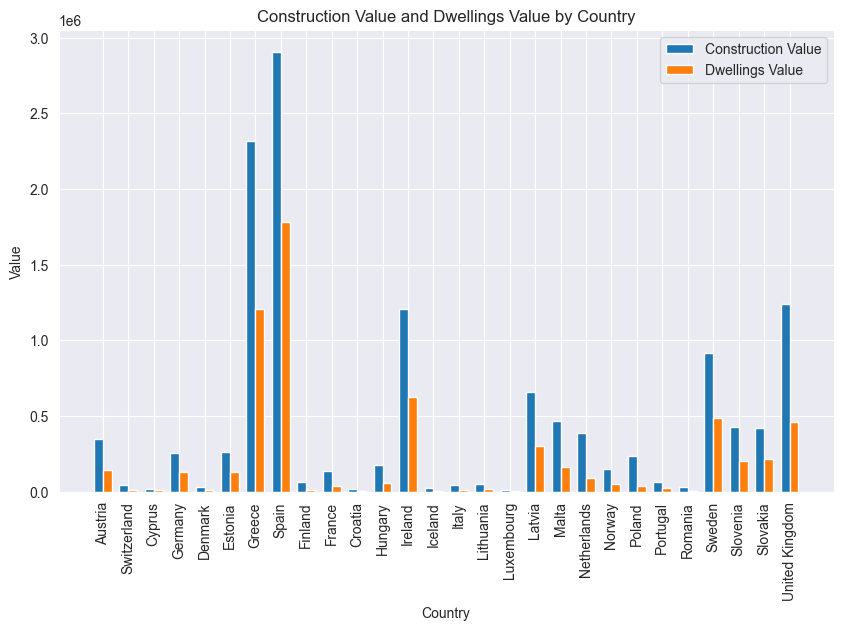

In [188]:
unique_countries = gfcf['Country'].unique()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(unique_countries))

rect1 = ax.bar(index, gfcf.groupby('Country')['Construction Value'].sum(), bar_width, label='Construction Value')
rect2 = ax.bar(index + bar_width, gfcf.groupby('Country')['Dwellings Value'].sum(), bar_width, label='Dwellings Value')

ax.set_xlabel('Country')
ax.set_ylabel('Value')
ax.set_title('Construction Value and Dwellings Value by Country')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(unique_countries, rotation='vertical')
ax.legend()

plt.show()

Year
2015-01-01    53056.267857
2016-01-01    53541.653571
2017-01-01    56063.150000
2018-01-01    59404.171429
2019-01-01    63321.317857
2020-01-01    54909.325926
2021-01-01    61280.251852
2022-01-01    69422.338462
Name: Construction Value, dtype: float64


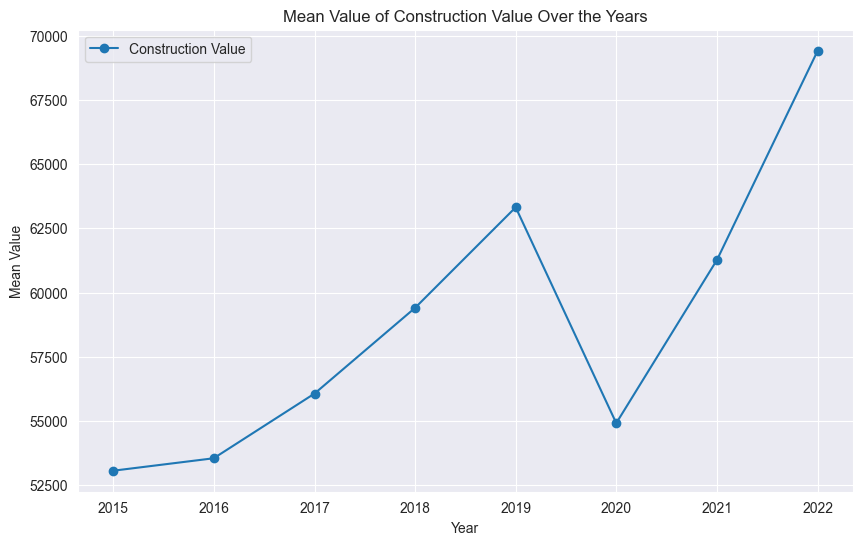

In [189]:
mean_values = gfcf.groupby('Year')['Construction Value'].mean()

print(mean_values)

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(mean_values.index, mean_values, marker='o', label='Construction Value')


ax.set_xlabel('Year')
ax.set_ylabel('Mean Value')
ax.set_title('Mean Value of Construction Value Over the Years')
ax.legend()

plt.show()

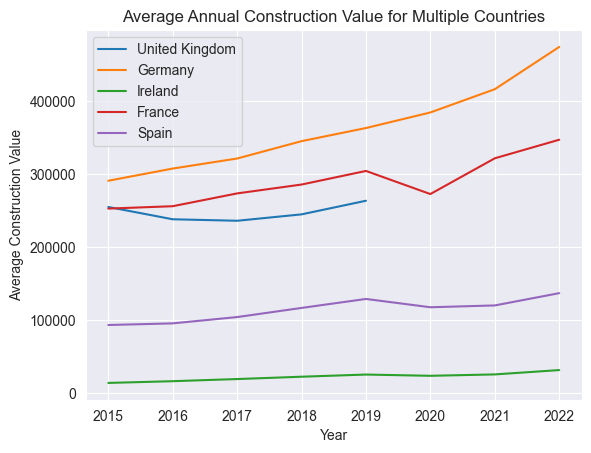

In [190]:
# Calculate mean values for each year and country
countries = ['United Kingdom', 'Germany','Ireland', 'France', 'Spain']
# mean_values = gfcf.groupby(['Year', 'Country']).mean().reset_index()

# Plot the mean production index values over time for each country
for country in countries:
    country_data = gfcf[gfcf['Country'] == country]
    mean_values = country_data.groupby('Year')['Construction Value'].mean()
    plt.plot(mean_values.index, mean_values.values, label=country)


plt.xlabel('Year')
plt.ylabel('Average Construction Value')
plt.title('Average Annual Construction Value for Multiple Countries')
plt.legend()
plt.show()

        unit       Year  Construction Value         Country  Dwellings Value
0    CP_MEUR 2015-01-01             36418.8         Austria          14658.8
1    CP_MEUR 2016-01-01             37227.7         Austria          15249.6
2    CP_MEUR 2017-01-01             39064.2         Austria          16556.5
3    CP_MEUR 2018-01-01             42484.1         Austria          17376.3
4    CP_MEUR 2019-01-01             45310.9         Austria          18672.7
..       ...        ...                 ...             ...              ...
215  CP_MEUR 2015-01-01            255287.7  United Kingdom          90926.4
216  CP_MEUR 2016-01-01            238457.3  United Kingdom          85255.3
217  CP_MEUR 2017-01-01            236405.9  United Kingdom          89516.0
218  CP_MEUR 2018-01-01            245183.2  United Kingdom          96023.6
219  CP_MEUR 2019-01-01            263833.4  United Kingdom          99809.7

[220 rows x 5 columns]
          Year  Construction Value  Country  Dwellin

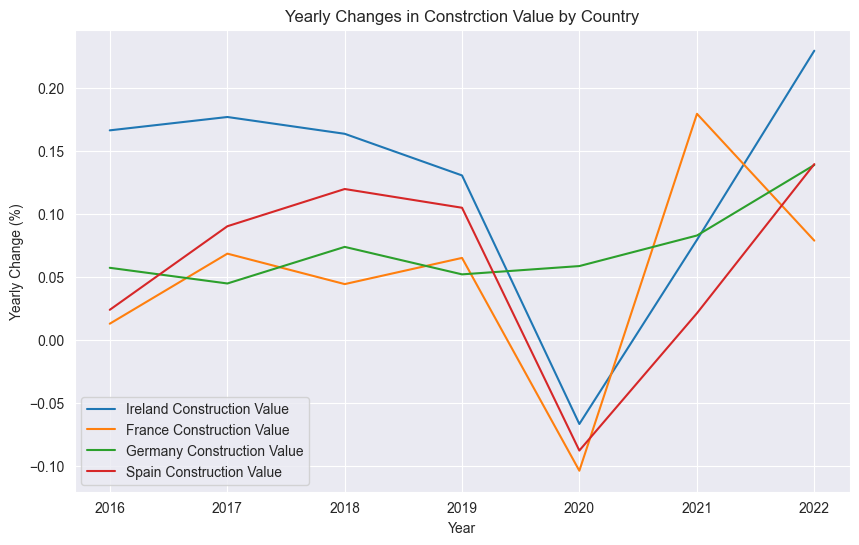

In [191]:
countries = ['Ireland', 'France', 'Germany', 'Spain']


print(gfcf)

# filter the data
filtered_data = gfcf[gfcf['Country'].isin(countries)]
filtered_data = filtered_data.drop('unit',axis=1)

print(filtered_data)

# Calculate the mean values for each year and country
mean_values = filtered_data.groupby(['Year', 'Country']).mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot yearly changes for Total Labor Employment Index
for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
    changes = country_data['Construction Value'].pct_change()
    ax.plot(country_data['Year'], changes, label=f'{country} Construction Value')


ax.set_xlabel('Year')
ax.set_ylabel('Yearly Change (%)')
ax.set_title('Yearly Changes in Constrction Value by Country')
ax.legend()
plt.show()

## GVA Data for Construction Producer Index (CPPI)

In [192]:
gva = pd.read_csv('Transformed Data/GVA.csv')
gva['Year'] = pd.to_datetime(gva['Year'], format='%Y')

print(gva.shape,  '\n')
print(gva.columns, '\n')
print(gva.isnull().sum())
print(gva.describe())

gva.head()

(366, 4) 

Index(['unit', 'Year', 'Construction Producer Price', 'Country'], dtype='object') 

unit                           0
Year                           0
Construction Producer Price    0
Country                        0
dtype: int64
                                Year  Construction Producer Price
count                            366                   366.000000
mean   2015-12-27 09:26:33.442622976                 25845.671858
min              2010-01-01 00:00:00                   212.800000
25%              2013-01-01 00:00:00                  2126.525000
50%              2016-01-01 00:00:00                  9095.200000
75%              2019-01-01 00:00:00                 29097.000000
max              2022-01-01 00:00:00                211102.000000
std                              NaN                 38508.379075


,unit,Year,Construction Producer Price,Country
0,CP_MEUR,2010-01-01,17123.6,Austria
1,CP_MEUR,2011-01-01,17476.8,Austria
2,CP_MEUR,2012-01-01,18028.3,Austria
3,CP_MEUR,2013-01-01,18545.6,Austria
4,CP_MEUR,2014-01-01,18958.7,Austria


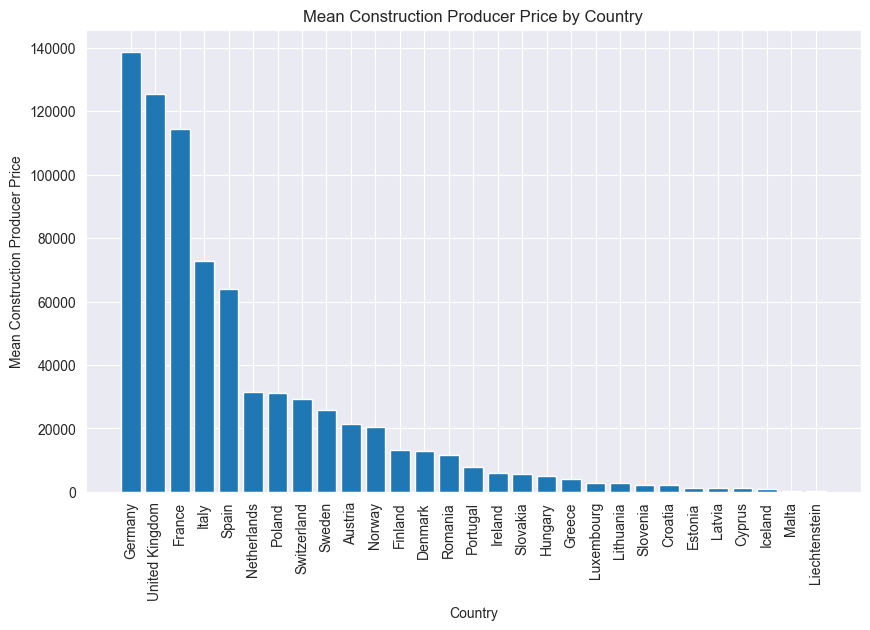

In [193]:
grouped_data = gva.groupby('Country')['Construction Producer Price'].mean()

sorted_data = grouped_data.sort_values(ascending=False)
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(sorted_data.index, sorted_data)
plt.xlabel('Country')
plt.ylabel('Mean Construction Producer Price')
plt.title('Mean Construction Producer Price by Country')
plt.xticks(rotation=90)
plt.show()

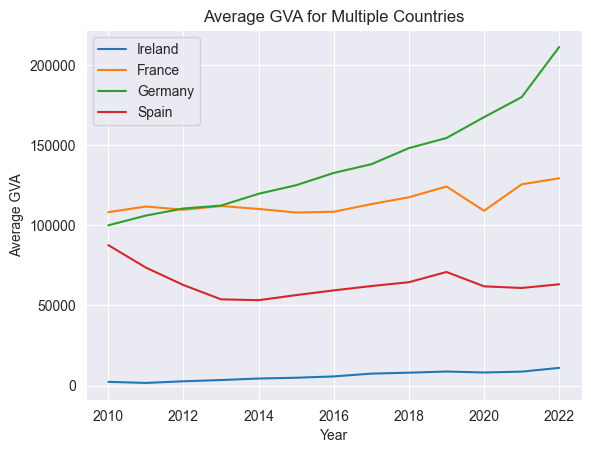

In [194]:
countries = ['Ireland', 'France', 'Germany', 'Spain']

# Plot the mean production index values over time for each country
for country in countries:
    country_data = gva[gva['Country'] == country]
    mean_values = country_data.groupby('Year')['Construction Producer Price'].mean()
    plt.plot(mean_values.index, mean_values.values, label=country)

plt.xlabel('Year')
plt.ylabel('Average GVA')
plt.title('Average GVA for Multiple Countries')
plt.legend()
plt.show()

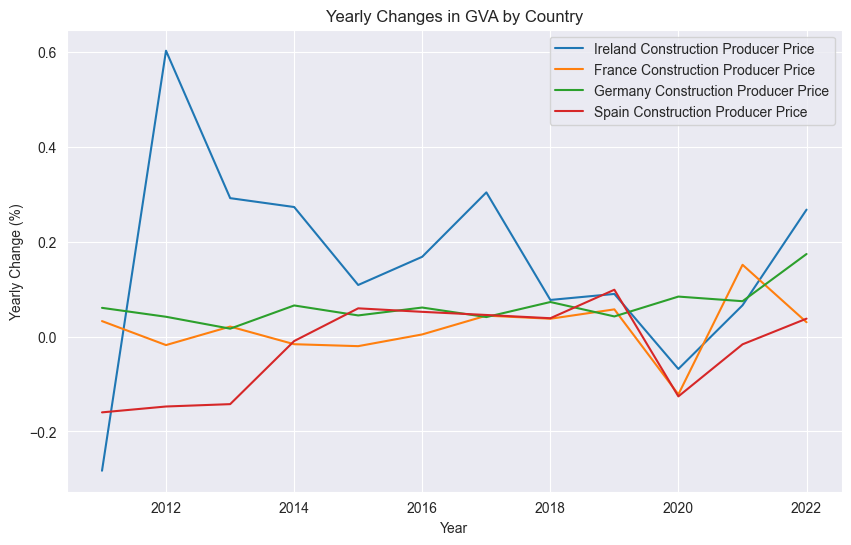

In [195]:
countries = ['Ireland', 'France', 'Germany', 'Spain']



# filter the data
filtered_data = gva[gva['Country'].isin(countries)]
filtered_data = filtered_data.drop('unit',axis=1)

# Calculate the mean values for each year and country
mean_values = filtered_data.groupby(['Year', 'Country']).mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot yearly changes for Total Labor Employment Index
for country in countries:
    country_data = mean_values[mean_values['Country'] == country]
    changes = country_data['Construction Producer Price'].pct_change()
    ax.plot(country_data['Year'], changes, label=f'{country} Construction Producer Price')


ax.set_xlabel('Year')
ax.set_ylabel('Yearly Change (%)')
ax.set_title('Yearly Changes in GVA by Country')
ax.legend()
plt.show()

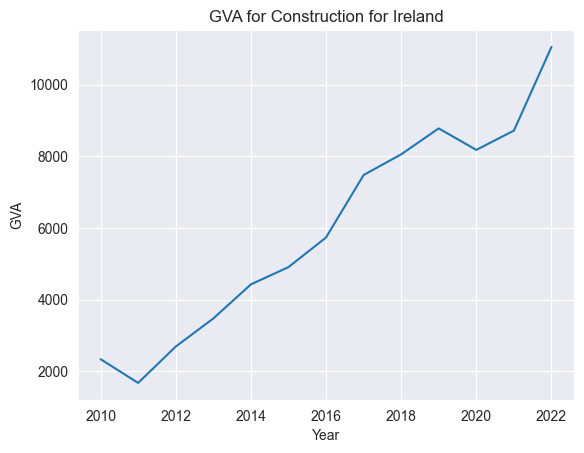

In [196]:
ir = 'Ireland'
country_data = gva[gva['Country'] == ir]

# Plot the production index values over time for the selected country
plt.plot(country_data['Year'], country_data['Construction Producer Price'])
plt.xlabel('Year')
plt.ylabel('GVA')
plt.title(f'GVA for Construction for {ir}')
plt.show()

## Structural Business Statistics

In [197]:
emp = pd.read_csv('Transformed Data/STS_Employment.csv')
enp = pd.read_csv("Transformed Data/STS_EnterpriseProduction.csv")
sub = pd.read_csv("Transformed Data/STS_SubContracting.csv")
turn = pd.read_csv("Transformed Data/STS_Turnover.csv")

print(f"Employment\n: {emp.head()}\n")
print(f"Enterprise Production\n: {enp.head()}\n")
print(f"Sub Contracting\n: {sub.head()}\n")
print(f"Turnover\n: {turn.head()}\n")

# renaming value type, oversight in etl notebook
emp = emp.rename(columns={'OBS_VALUE':'Total_Employment'})
enp = enp.rename(columns={'OBS_VALUE':'Total_Enterprise_Production'})
sub = sub.rename(columns={'OBS_VALUE':'Total_Sub_Contracting'})
turn = turn.rename(columns={'OBS_VALUE':'Total_Turnover'})

Employment
:   size_emp  Year  OBS_VALUE  Country
0    TOTAL  2011      31573  Austria
1    TOTAL  2012      32174  Austria
2    TOTAL  2013      33518  Austria
3    TOTAL  2014      34227  Austria
4    TOTAL  2015      34564  Austria

Enterprise Production
:    Year  OBS_VALUE  Country
0  2011    40266.5  Austria
1  2012    42190.4  Austria
2  2013    42335.2  Austria
3  2014    43373.8  Austria
4  2015    44959.3  Austria

Sub Contracting
:   size_emp  Year  OBS_VALUE   Country
0    TOTAL  2020    13629.4   Austria
1    TOTAL  2020    21030.3   Belgium
2    TOTAL  2020     4634.2  Bulgaria
3    TOTAL  2020     1446.0    Cyprus
4    TOTAL  2020    14851.6   Czechia

Turnover
:    Year  OBS_VALUE   Country
0  2020    53749.5   Austria
1  2020    67758.1   Belgium
2  2020    11253.2  Bulgaria
3  2020     4015.0    Cyprus
4  2020    33018.0   Czechia



In [198]:
# STS 1 represents the Employment and the Enterprise Production
sts1 = emp.merge(enp)
sts1['Year'] = pd.to_datetime(sts1['Year'], format='%Y')

# STS 2 represents the Sub contracting and the Enterprise Production
sts2 = sub.merge(turn)
sts2['Year'] = pd.to_datetime(sts2['Year'], format='%Y')


print(sts1.head())
print(sts2.head())

  size_emp       Year  Total_Employment  Country  Total_Enterprise_Production
0    TOTAL 2011-01-01             31573  Austria                      40266.5
1    TOTAL 2012-01-01             32174  Austria                      42190.4
2    TOTAL 2013-01-01             33518  Austria                      42335.2
3    TOTAL 2014-01-01             34227  Austria                      43373.8
4    TOTAL 2015-01-01             34564  Austria                      44959.3
  size_emp       Year  Total_Sub_Contracting   Country  Total_Turnover
0    TOTAL 2020-01-01                13629.4   Austria         53749.5
1    TOTAL 2020-01-01                 9770.8   Austria         53749.5
2    TOTAL 2020-01-01                21030.3   Belgium         67758.1
3    TOTAL 2020-01-01                 7876.8   Belgium         67758.1
4    TOTAL 2020-01-01                 4634.2  Bulgaria         11253.2


<Axes: >

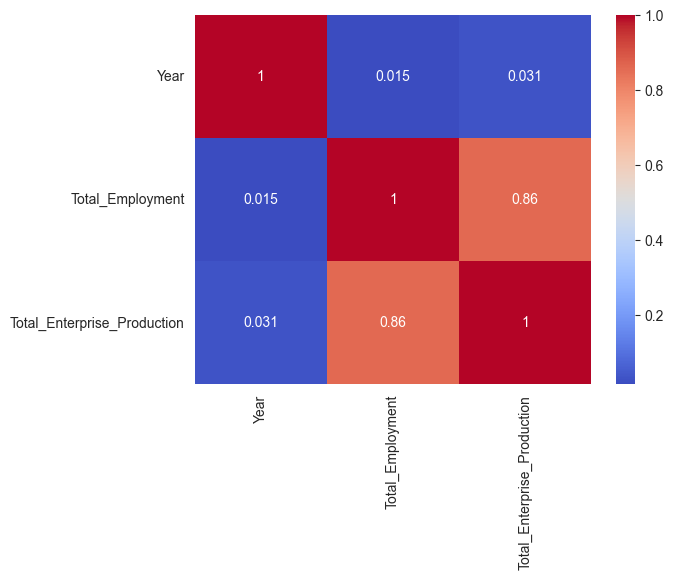

In [199]:
corr_df = sts1.drop(['size_emp','Country'],axis=1)

sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')

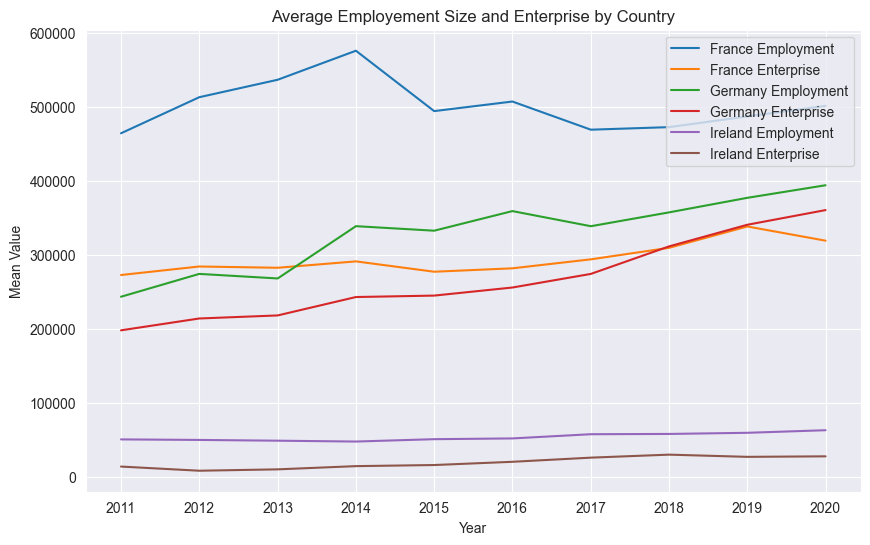

In [200]:
countries = ['Ireland', 'France', 'Germany']

sts1 = sts1.drop(['size_emp'],axis=1)
filtered_data = sts1[sts1['Country'].isin(countries)]

avg_values = filtered_data.groupby(['Year', 'Country']).mean().reset_index()

# Plot the average values for each country over time
fig, ax = plt.subplots(figsize=(10, 6))

countries = avg_values['Country'].unique()
for country in countries:
    country_data = avg_values[avg_values['Country'] == country]
    ax.plot(country_data['Year'], country_data['Total_Employment'], label=f'{country} Employment')
    ax.plot(country_data['Year'], country_data['Total_Enterprise_Production'], label=f'{country} Enterprise')

ax.set_xlabel('Year')
ax.set_ylabel('Mean Value')
ax.set_title('Average Employement Size and Enterprise by Country')
ax.legend(loc='upper right')

<Axes: >

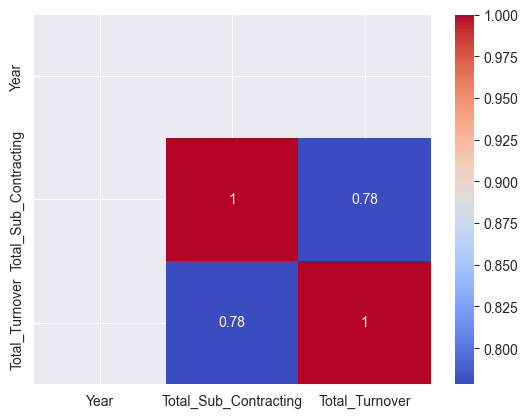

In [201]:
corr_df = sts2.drop(['size_emp','Country'],axis=1)

sns.heatmap(corr_df.corr(), annot=True, cmap='coolwarm')

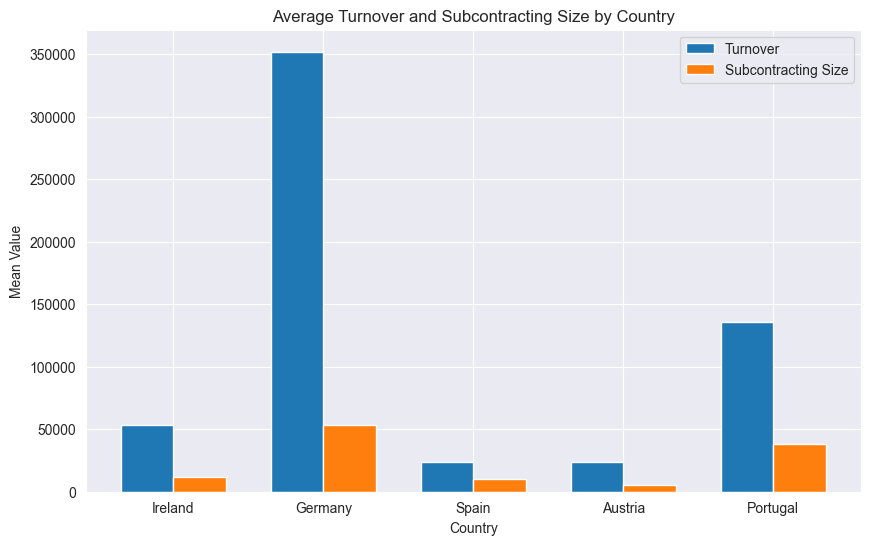

In [202]:
countries = ['Ireland', 'Germany', 'Spain', 'Austria', 'Portugal']

sts2 = sts2.drop(['size_emp'],axis=1)
filtered_data = sts2[sts2['Country'].isin(countries)]

# Calculate the average values for each country
avg_values = filtered_data.groupby('Country').mean().reset_index()

# Set the width of each bar
bar_width = 0.35

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Position of the bars on the x-axis
x = np.arange(len(countries))

# Plotting average turnover
ax.bar(x - bar_width/2, avg_values['Total_Turnover'], width=bar_width, label='Turnover')

# Plotting average subcontracting size
ax.bar(x + bar_width/2, avg_values['Total_Sub_Contracting'], width=bar_width, label='Subcontracting Size')

ax.set_xlabel('Country')
ax.set_ylabel('Mean Value')
ax.set_title('Average Turnover and Subcontracting Size by Country')
ax.set_xticks(x)
ax.set_xticklabels(countries)
ax.legend()

plt.show()

## Statistical Tests - STS

A significance level of 0.05 is commonly used in many scientific studies. It means that there's essentially a 5% chance of getting the observed result if the null hypothesis is true.

In [203]:
# Assumption 1: Normality test of Total Employment
group_names = sts1['Country'].unique()

for group in group_names:
    group_data = sts1[sts1['Country'] == group]['Total_Employment']

    # Perform the Shapiro-Wilk test for normality distribution
    statistic, p_value = stats.shapiro(group_data)

    if p_value < 0.05:
        print(f"Group {group} does not follow a normal distribution.")
    else:
        print(f"Group {group} follows a normal distribution.")

# Assumption 2: Homogeneity of variances test
# Use Levene's test for equality of variances

indices = np.where(group_names == "Ireland")
group_names = np.delete(group_names,indices) # drop Ireland from array

for country in group_names:

    statistic, p_value = stats.levene(sts1[sts1['Country'] == 'Ireland']['Total_Employment'],
                                     sts1[sts1['Country'] == country]['Total_Employment'])

    if p_value < 0.05:
        print(f"Variances are not equal across groups Ireland and {country}")
    else:
        print(f"Variances are equal across groups Ireland and {country}")

# Assumption 3: Independence
# Assuming independence is met through appropriate data collection methods

Group Austria follows a normal distribution.
Group Switzerland follows a normal distribution.
Group Cyprus follows a normal distribution.
Group Germany follows a normal distribution.
Group Denmark follows a normal distribution.
Group Estonia follows a normal distribution.
Group Greece follows a normal distribution.
Group Spain does not follow a normal distribution.
Group Finland follows a normal distribution.
Group France follows a normal distribution.
Group Croatia follows a normal distribution.
Group Hungary follows a normal distribution.
Group Ireland follows a normal distribution.
Group Iceland follows a normal distribution.
Group Italy follows a normal distribution.
Group Lithuania follows a normal distribution.
Group Luxembourg follows a normal distribution.
Group Latvia does not follow a normal distribution.
Group Malta follows a normal distribution.
Group Netherlands follows a normal distribution.
Group Poland follows a normal distribution.
Group Portugal follows a normal distr

In [204]:
# Assumption 1: Normality test
group_names = sts1['Country'].unique()

for group in group_names:
    group_data = sts1[sts1['Country'] == group]['Total_Enterprise_Production']
    # Perform the Shapiro-Wilk test for normality
    statistic, p_value = stats.shapiro(group_data)

    if p_value < 0.05:
        print(f"Group {group} does not follow a normal distribution.")
    else:
        print(f"Group {group} follows a normal distribution.")

# Assumption 2: Homogeneity of variances test
# Use Levene's test for equality of variances
indices = np.where(group_names == "Ireland")
group_names = np.delete(group_names,indices) # drop Ireland from array

for country in group_names:

    statistic, p_value = stats.levene(sts1[sts1['Country'] == 'Ireland']['Total_Enterprise_Production'],
                                     sts1[sts1['Country'] == country]['Total_Enterprise_Production'])

    if p_value < 0.05:
        print(f"Variances are not equal across groups Ireland and {country}")
    else:
        print(f"Variances are equal across groups Ireland and {country}")

# Assumption 3: Independence
# Assuming independence is met through appropriate data collection methods

Group Austria follows a normal distribution.
Group Switzerland follows a normal distribution.
Group Cyprus follows a normal distribution.
Group Germany follows a normal distribution.
Group Denmark follows a normal distribution.
Group Estonia follows a normal distribution.
Group Greece follows a normal distribution.
Group Spain follows a normal distribution.
Group Finland follows a normal distribution.
Group France follows a normal distribution.
Group Croatia follows a normal distribution.
Group Hungary does not follow a normal distribution.
Group Ireland follows a normal distribution.
Group Iceland follows a normal distribution.
Group Italy does not follow a normal distribution.
Group Lithuania follows a normal distribution.
Group Luxembourg follows a normal distribution.
Group Latvia follows a normal distribution.
Group Malta follows a normal distribution.
Group Netherlands follows a normal distribution.
Group Poland follows a normal distribution.
Group Portugal follows a normal distr

I can see from the above tests that only some countries have a normal distribution AND similar variances to Ireland with the Total Employment variable and Total Enterprise Production.
One of these countries is Sweden.

In [205]:
gr1 = 'Ireland'
group1_employment = sts1[sts1['Country'] == gr1]['Total_Employment']
group1_production = sts1[sts1['Country'] == gr1]['Total_Enterprise_Production']

gr2 = 'Sweden'
group2_employment = sts1[sts1['Country'] == gr2]['Total_Employment']
group2_production = sts1[sts1['Country'] == gr2]['Total_Enterprise_Production']

# Set the significance level (alpha)
alpha = 0.05

# Perform the t-test for Total Employment
t_statistic_employment, p_value_employment = stats.ttest_ind(group1_employment, group2_employment)

# Compare the p-value with the significance level for Total Employment
if p_value_employment < alpha:
    print("There is a significant difference between the means of Total Employment for Ireland and Germany.")
else:
    print("There is no significant difference between the means of Total Employment for Ireland and Germany.")

# Perform the t-test for Total Enterprise Production
t_statistic_production, p_value_production = stats.ttest_ind(group1_production, group2_production)

# Compare the p-value with the significance level for Total Enterprise Production
if p_value_production < alpha:
    print("There is a significant difference between the means of Total Enterprise Production for Ireland and Germany.")
else:
    print("There is no significant difference between the means of Total Enterprise Production for Ireland and Germany.")


There is a significant difference between the means of Total Employment for Ireland and Germany.
There is a significant difference between the means of Total Enterprise Production for Ireland and Germany.


There is not enough evidence to support a correlation between the variables.


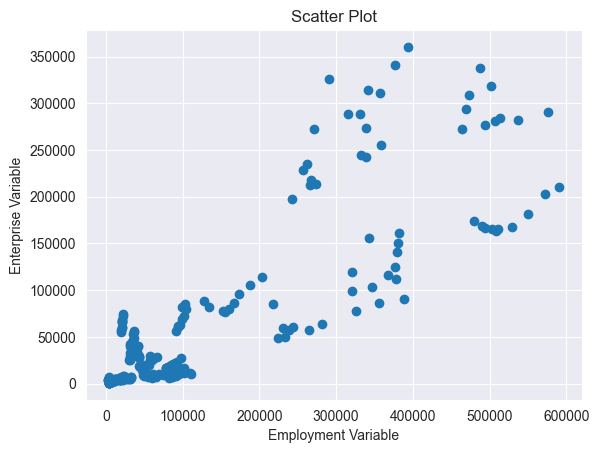

In [206]:
# Set the significance level (alpha)
alpha = 0.05

variable1 = sts1['Total_Employment']
variable2 = sts1['Total_Enterprise_Production']

# Calculate Spearman's correlation coefficient (rho) and p-value
rho, p_value = stats.spearmanr(variable1, variable2)

# Determine the degrees of freedom (df)
n = len(variable1)
df = n - 2

# Calculate the critical value of rho based on the significance level and degrees of freedom
critical_value = stats.t.ppf(1 - alpha/2, df)

# Compare the calculated correlation coefficient (rho) with the critical value
if abs(rho) > critical_value:
    # Reject the null hypothesis and conclude that there is a statistically significant correlation
    print("There is a statistically significant correlation between the variables.")
else:
    # Fail to reject the null hypothesis and conclude that there is not enough evidence to support a correlation
    print("There is not enough evidence to support a correlation between the variables.")


plt.scatter(variable1, variable2)
plt.xlabel('Employment Variable')
plt.ylabel('Enterprise Variable')
plt.title('Scatter Plot')
plt.show()

In [207]:
# Perform ANOVA using statsmodels
model = ols('Total_Employment ~ C(Country)', data=sts1).fit()
results = sm.stats.anova_lm(model, typ=2)

residuals = model.resid # residuals for a model

# Check normality assumption
normality_test = stats.shapiro(residuals)

if normality_test.pvalue < 0.05:
    print("The residuals do not follow a normal distribution. Anova is not valid for this test")

    print('Doing a non parametric test: Kruskal-Wallis test instead of Anova')

    grouped_residuals = [residuals[sts1['Country'] == country] for country in sts1['Country'].unique()]

    # Perform Kruskal-Wallis test
    statistic, p_value = stats.kruskal(*grouped_residuals)

    if p_value < 0.05:
        print("There is a significant difference between the means of the groups.")
    else:
        print("There is no significant difference between the means of the groups.")

else:
    print("The residuals follow a normal distribution.")

    # Extract the F-statistic and p-value
    f_statistic = results['F']['C(Country)']
    p_value = results['PR(>F)']['C(Country)']

    if p_value < 0.05:
        print("There is a significant difference between the means of the groups.")
    else:
        print("There is no significant difference between the means of the groups.")


The residuals do not follow a normal distribution. Anova is not valid for this test
Doing a non parametric test: Kruskal-Wallis test instead of Anova
There is no significant difference between the means of the groups.


In [210]:
# Perform ANOVA using statsmodels
model = ols('Total_Enterprise_Production ~ C(Country)', data=sts1).fit()
results = sm.stats.anova_lm(model, typ=2)

residuals = model.resid # residuals for a model

# Check normality assumption
normality_test = stats.shapiro(residuals)

if normality_test.pvalue < 0.05:
    print("The residuals do not follow a normal distribution. Anova is not valid for this test")

    print('Doing a non parametric test: Kruskal-Wallis test instead of Anova')

    grouped_residuals = [residuals[sts1['Country'] == country] for country in sts1['Country'].unique()]

    # Perform Kruskal-Wallis test
    statistic, p_value = stats.kruskal(*grouped_residuals)

    if p_value < 0.05:
        print("There is a significant difference between the means of the groups.")
    else:
        print("There is no significant difference between the means of the groups.")

else:
    print("The residuals follow a normal distribution.")

    # Extract the F-statistic and p-value
    f_statistic = results['F']['C(Country)']
    p_value = results['PR(>F)']['C(Country)']

    if p_value < 0.05:
        print("There is a significant difference between the means of the groups.")
    else:
        print("There is no significant difference between the means of the groups.")


The residuals do not follow a normal distribution. Anova is not valid for this test
Doing a non parametric test: Kruskal-Wallis test instead of Anova
There is no significant difference between the means of the groups.
